# 80's A-Z Leftovers

A few months after the first, massive,
[2016 A-Z playlist](http://xpn.org/music-artist/885-countdown/2016/xpn-a-z),
WXPN did a follow on
[A-Z Leftovers](http://xpn.org/music-artist/885-countdown/2016/az-leftovers)
that covered all the non-alphabetic songs:
numbers, parenthenticals, etc.
Well this year, as soon as the
[80's A-Z](http://xpn.org/music-artist/xpn-a-z) ended,
it segued into a leftovers for numbers and punctuation.
Since the data doesn't exactly fit what I'd been doing in my
[80's A-Z notebook](80sA2Z.ipynb), 
here's another bit of analysis.

In [1]:
%matplotlib inline
from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide();
    } else {
        $('div.input').show();
    }
        code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
''')

## Status

 * Seriously, the leftovers were only 3 hours.,
   Hardly enough for lunch, a quick nap and cleaning up the,
   [80's A-Z notebook](80sA2Z.ipynb).
   This is what I threw together quickly.
 * Given the small data set, it may not merit
   a ton of additional analysis.

## Loading the data

If you're interested in how the data gets loaded,
take a look at my consolidated
[Data Loading notebook](DataLoading.ipynb).
if you want a copy of the enriched data,
feel free to grab a copy of [80sleftovers.csv](data/80sLeftovers.csv).

In [2]:
import pandas as pd
from datetime import date, datetime, time, timedelta
from os import path
data_dir = './data'
playlist_file = path.join(data_dir, '80sLeftovers.csv')
playlist = pd.read_csv(playlist_file)

playlist['Air Time'] = pd.to_datetime(playlist['Air Time'], errors='coerce')
last_play = playlist.loc[playlist['Air Time'].idxmax()]
end_time = last_play['Air Time'] + timedelta(seconds = 60 * last_play['Duration'])
HTML('<p>So far, as of %s, we have seen %d tracks with %d unique titles, from %d artists.</p>' %\
    (end_time.strftime('%b %d %I:%M%p'),
     len(playlist),
     playlist.describe(include='all')['Title']['unique'], 
     playlist.describe(include='all')['Artist']['unique']
     ))

## Data Analysis

### First Characters of Titles

Well, we're here because the titles don't start with letters.
So what do they begin with?


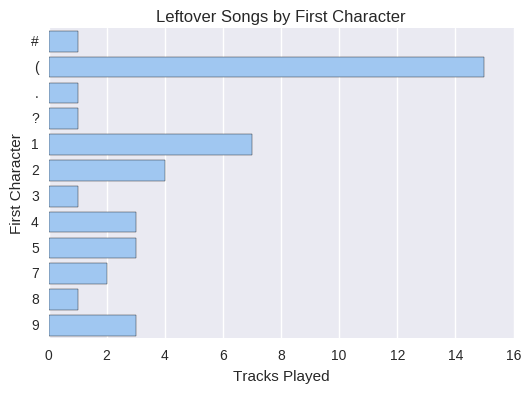

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(6, 4))
sns.set_color_codes('pastel')
sns.countplot(y='First Character', data=playlist, color='b')
ax.set(xlabel="Tracks Played")
ax.set_title('Leftover Songs by First Character')

### First Words, in just the parentheticals

The parenthetical songs pretty all have words inside the parentheses,
so we can break them down and look for patterns there.
Unlike the 2016 leftovers, this one was pretty short,
so there isn't much here.

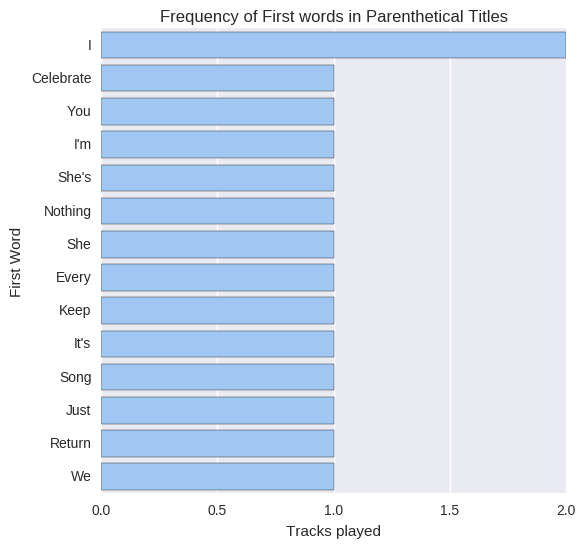

In [4]:
paran_words = playlist[playlist['Title'].str.startswith('(')]['Title'].str.extract('([\w\']+)').value_counts()
paran_word_freq = pd.DataFrame(zip(paran_words.keys().tolist(), paran_words.tolist()),
                               columns=('First Word', 'Count'))
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y='First Word', x='Count', data=paran_word_freq, orient='h', color='b')
ax.set(xlabel='Tracks played')
ax.set_title('Frequency of First words in Parenthetical Titles')

### Popular Numbers

Again this might not make much sense in such a short playlist,
but we'll give it a try.

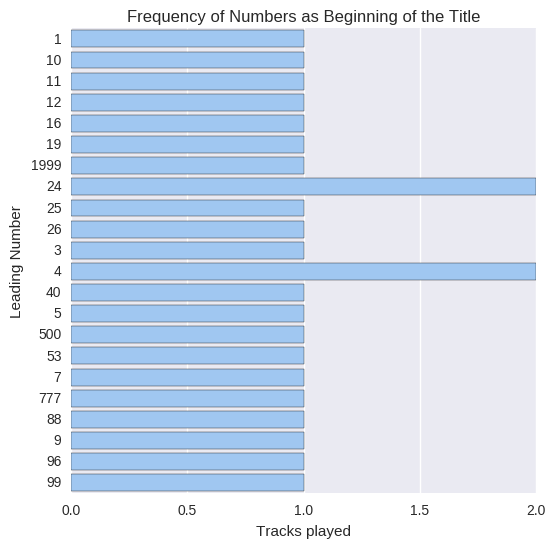

In [5]:
number_counts = playlist[playlist['Title'].str.match('^\d')]['Title'].str.extract('(\d+)').value_counts()
number_freq = pd.DataFrame(zip(number_counts.keys().tolist(), number_counts.tolist()),
                          columns=('Leading Number', 'Count'))
number_freq = number_freq.sort_values(by = 'Count')
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y='Leading Number', x='Count', data=number_freq, orient='h', color='b')
ax.set(xlabel='Tracks played')
ax.set_title('Frequency of Numbers as Beginning of the Title')

### Artists

Who did we play in the leftovers?
Other the U2, there were no repeat artists.


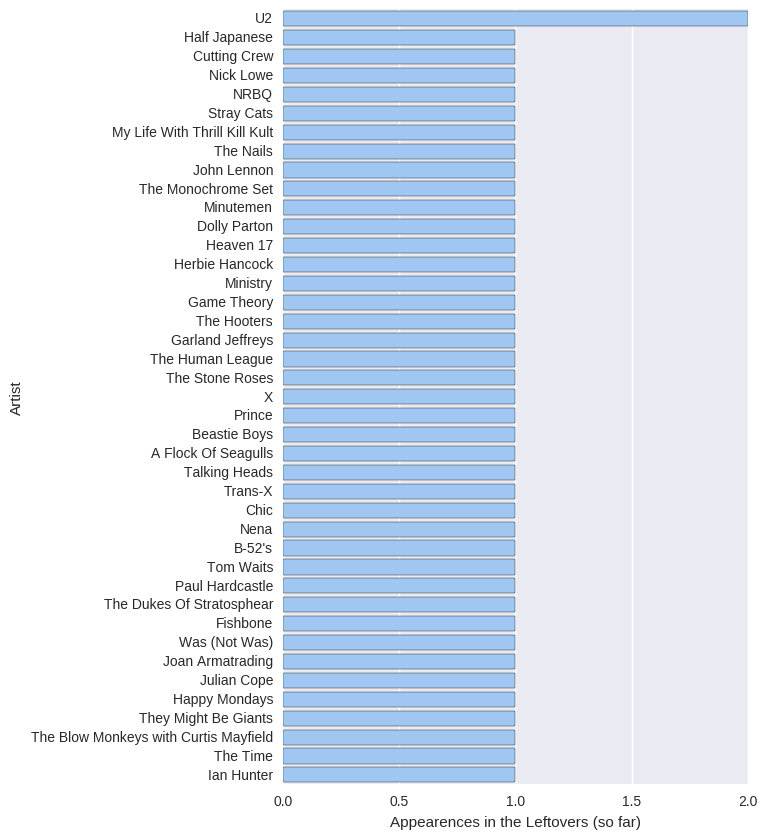

In [6]:
c = playlist['Artist'].value_counts()
artists = pd.DataFrame(zip(c.keys().tolist(), c.tolist()),
                       columns=('Artist', 'count'))
f, ax = plt.subplots(figsize=(6, 10))
sns.set_color_codes('pastel')
sns.barplot(y='Artist', x='count', data=artists, color='b')
ax.set(xlabel="Appearences in the Leftovers (so far)")

### Publication Years

When did the songs come from?
Not sure what this tells up,
but it may be the least uninteresting graph we got from this data. 

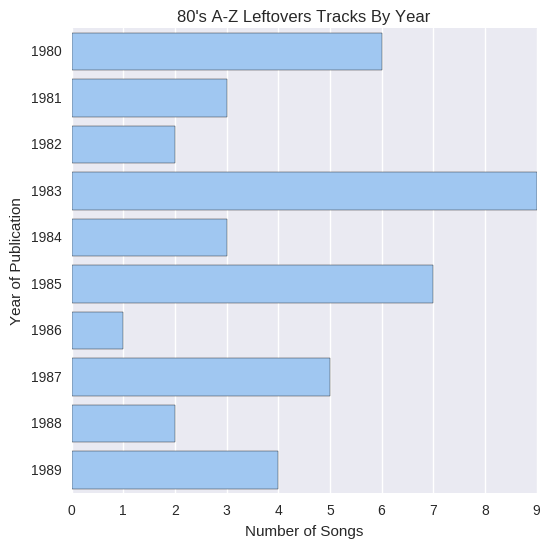

In [7]:
c = playlist['Year'].value_counts()
year_counts = pd.DataFrame(zip(c.keys().tolist(), c.tolist()),
                       columns=('Year', 'Count'))
f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes('pastel')
sns.barplot(y='Year', x='Count',
            data=year_counts[year_counts['Year'] > 1910],
            orient='h', color='b')
ax.set(xlabel="Number of Songs", ylabel="Year of Publication")
ax.set_title("80's A-Z Leftovers Tracks By Year")